<a href="https://colab.research.google.com/github/Voltstrike/Rank-Prediction/blob/main/Rank_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
import os
import pandas as pd

# Step 1: Download dataset
path = kagglehub.dataset_download("dhruvildave/billboard-the-hot-100-songs")
print("Dataset downloaded to:", path)
print("Files in dataset:", os.listdir(path))

# Step 2: Point to the CSV file
csv_path = os.path.join(path, "charts.csv")

# Step 3: Try UTF-8, fallback to Latin1
try:
    df = pd.read_csv(csv_path, encoding="utf-8")
except UnicodeDecodeError:
    df = pd.read_csv(csv_path, encoding="latin1")

# Step 4: Check the data
print("Shape:", df.shape)
df.head()


Using Colab cache for faster access to the 'billboard-the-hot-100-songs' dataset.
Dataset downloaded to: /kaggle/input/billboard-the-hot-100-songs
Files in dataset: ['charts.csv']
Shape: (330087, 7)


,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
3,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19
4,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18


In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330087 entries, 0 to 330086
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            330087 non-null  object 
 1   rank            330087 non-null  int64  
 2   song            330087 non-null  object 
 3   artist          330087 non-null  object 
 4   last-week       297775 non-null  float64
 5   peak-rank       330087 non-null  int64  
 6   weeks-on-board  330087 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 17.6+ MB


,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
3,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19
4,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['artist_popularity'] = df.groupby(["date", "artist"])["song"].transform("count")
df["reentry"] = ((df["weeks-on-board"] > 1) & (df["last-week"].isna())).astype(int)
df["debut"] = df["last-week"].isna().astype(int)
df["day_of_year"] = df["date"].dt.dayofyear
df["last-week"] = df["last-week"].fillna(101)

features = [
    "last-week", "peak-rank", "weeks-on-board",
    "year", "month", "day_of_year",
    "artist_popularity", "reentry", "debut"
]
X = df[features]
y = df["rank"]

print("Features used:", features)
print("X shape:", X.shape)

Features used: ['last-week', 'peak-rank', 'weeks-on-board', 'year', 'month', 'day_of_year', 'artist_popularity', 'reentry', 'debut']
X shape: (330087, 9)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 5.980060705884072


In [ ]:
sample = X_test.iloc[0:1]
predicted_rank = model.predict(sample)
print("Predicted Rank:", predicted_rank)
print("Actual rank:", y_test.iloc[0])

Predicted Rank: [86.1]
Actual rank: 59


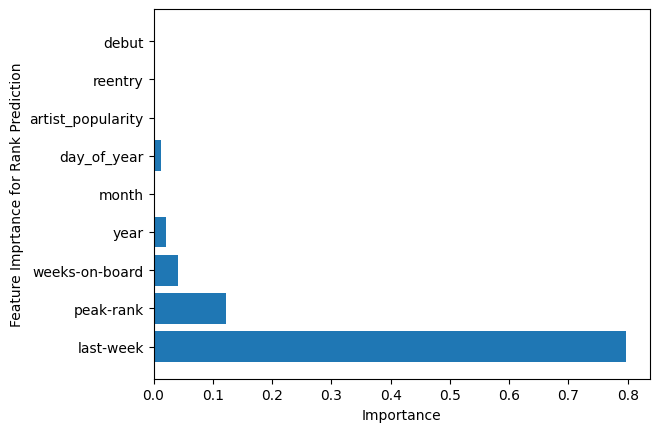

In [ ]:
import matplotlib.pyplot as plt

importance = model.feature_importances_
plt.barh(features, importance)
plt.xlabel("Importance")
plt.ylabel("Feature Imprtance for Rank Prediction")
plt.show()

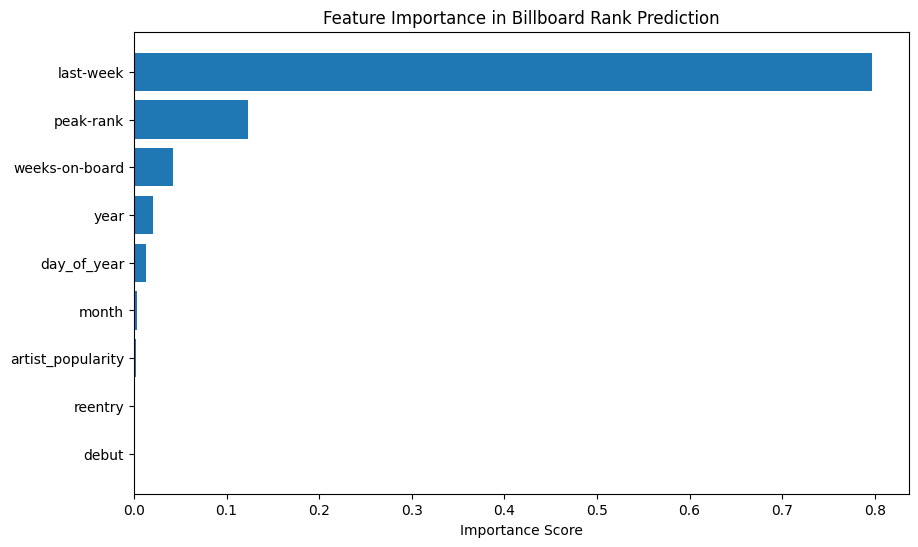

In [ ]:
import pandas as pd
importances = model.feature_importances_
feature_names = X.columns

feat_importances = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
})


feat_importances = feat_importances.sort_values(by="Importance", ascending = False)
plt.figure(figsize=(10,6))
plt.barh(feat_importances["Feature"], feat_importances["Importance"])
plt.gca().invert_yaxis()
plt.title("Feature Importance in Billboard Rank Prediction")
plt.xlabel("Importance Score")
plt.show()